# **Análisis discriminante aplicado a una base de datos sobre calidad de vinos:**

## Importación de librerías base
---

In [ ]:
# Importacion de librerías
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Aplicamos formato de inputs para una mejor visualización
np.set_printoptions(precision=4)
pd.set_option('display.precision', 4)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/GerhardSpross/Datasets-prueba/refs/heads/main/wine-quality-white-and-red.csv")

## Análisis exploratorio
---

In [ ]:
print('********** Información del dataframe: ****************')
df.info()

********** Información del dataframe: ****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
print('********** Estadísticas Descriptivas: ****************')
print(df.describe())

********** Estadísticas Descriptivas: ****************
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count      6497.0000         6497.0000    6497.0000       6497.0000   
mean          7.2153            0.3397       0.3186          5.4432   
std           1.2964            0.1646       0.1453          4.7578   
min           3.8000            0.0800       0.0000          0.6000   
25%           6.4000            0.2300       0.2500          1.8000   
50%           7.0000            0.2900       0.3100          3.0000   
75%           7.7000            0.4000       0.3900          8.1000   
max          15.9000            1.5800       1.6600         65.8000   

       chlorides  free sulfur dioxide  total sulfur dioxide    density  \
count   6497.000            6497.0000             6497.0000  6497.0000   
mean       0.056              30.5253              115.7446     0.9947   
std        0.035              17.7494               56.5219     0.0030   
min      

In [ ]:
print('********** Cantidad de valores nulos: ****************')
print(df.isnull().sum())

********** Cantidad de valores nulos: ****************
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
print('********** Cantidad de valores duplicados: ****************')
print(df.duplicated().sum())

********** Cantidad de valores duplicados: ****************
1177


In [ ]:
print('********** Distribución de clases DataFrame original ****************')
print(df['quality'].value_counts())

********** Distribución de clases DataFrame original ****************
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


## Ingeniería de características (Feature Engineering)
---

In [ ]:
def agrupar_calidad(calidad):
  if calidad <=4:
    return 'Baja'
  elif calidad <=6:
    return 'Media'
  else:
      return 'Alta'

In [ ]:
df['calidad_agrupada'] = df['quality'].apply(agrupar_calidad)

In [ ]:
print('********** Nueva distribución de clases (calidad_agrupada) ****************')

********** Nueva distribución de clases (calidad_agrupada) ****************


In [ ]:
print(df['calidad_agrupada'].value_counts())

calidad_agrupada
Media    4974
Alta     1277
Baja      246
Name: count, dtype: int64


In [ ]:
# Proceso de separación de features (x) y variable objetivo (y)
# donde 'y' se transforma en una nueva columna agrupada así:}
y = df['calidad_agrupada']

In [ ]:
# 'x' por otra parte, contiene todas las features originales del dataset excepto las
# columnas de calidad, incluimos 'type' para que sea transformada también con get_dummies
x = df.drop(['quality', 'calidad_agrupada'], axis =1)

In [ ]:
# aquí aplicamos pd.get_dummies() a x para transformar su contenido
# esto transformará 'type' en 'type_red' y 'type_white'
x = pd.get_dummies(x)

In [ ]:
print('************* Primeras filas de features (x) con dummiess **************')
print(x.head())

************* Primeras filas de features (x) con dummiess **************
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  t

In [ ]:
# preparamos los datos para hacerlos uniformes en las categorías de 'baja', 'media' y 'alta'
# esto nos permitirá mantener datos coherentes y de calidad para la fase de testeo y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

In [ ]:
print(f" ****** Tamaño de los sets *********")
print(f"Set de entrenamiento (x_train): {x_train.shape}")
print(f"Set de prueba (x_test):     {x_test.shape}")

 ****** Tamaño de los sets *********
Set de entrenamiento (x_train): (5847, 13)
Set de prueba (x_test):     (650, 13)


## Estandarización (etapa de pre-procesamiento)
---

In [ ]:
# aquí evitamos cualquier fuga de datos (data leakage), lo mejor es hacerlo después del
# split de la etapa de training y testeo:
scaler = StandardScaler()



In [ ]:
# realizamos ajuste -fiting- del escalador únicamente con 'x' - x_train
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
# posteriormente obtenemos la media y la desviación estándar de x_train
x_test_scaled = scaler.transform(x_test)

In [ ]:
print("¡Datos estandarizados listos!")

¡Datos estandarizados listos!


## Entrenamiento del modelo
---

In [ ]:
# paso 1. definimos el número de componentes donde n_components = 2
# n_componentes = 2 es el máximo posible para nuestras 3 categorías (bajo, medio y alto)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
# entrenamiento del clasificador del modelo de análisis discriminante
lda.fit(x_train_scaled, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
print("¡Modelo LDA - Discriminante listo!")

¡Modelo LDA - Discriminante listo!


In [ ]:
print("Varianza entre clases: explicación de los 2 componentes:")
print(f"Radio de varianza: {lda.explained_variance_ratio_}")
print(f"Varianza acumulada: {np.cumsum(lda.explained_variance_ratio_)}")

Varianza entre clases: explicación de los 2 componentes:
Radio de varianza: [0.8517 0.1483]
Varianza acumulada: [0.8517 1.    ]


## Evaluación del desempeño del modelo
---

In [ ]:
# prueba 1. predicción sobre el test de PRUEBA
y_pred = lda.predict(x_test_scaled)
print("******** Reporte de clasificación ******")
print(classification_report(y_test, y_pred))

******** Reporte de clasificación ******
              precision    recall  f1-score   support

        Alta       0.52      0.28      0.37       128
        Baja       0.67      0.08      0.15        24
       Media       0.80      0.93      0.86       498

    accuracy                           0.77       650
   macro avg       0.66      0.43      0.46       650
weighted avg       0.74      0.77      0.74       650



In [ ]:
# matriz de confusión sobre prueba 1
print("******** Matriz de confusión **********")
conf_matrix = confusion_matrix(y_test, y_pred, labels = lda.classes_)

******** Matriz de confusión **********


In [ ]:
print(conf_matrix)

[[ 36   0  92]
 [  0   2  22]
 [ 33   1 464]]


In [ ]:
print(confusion_matrix)

<function confusion_matrix at 0x7fc9eef96840>


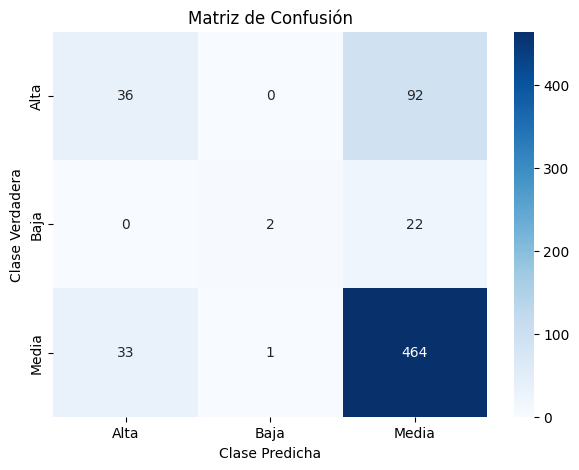

In [ ]:
# visualización de la matriz de confusión

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()

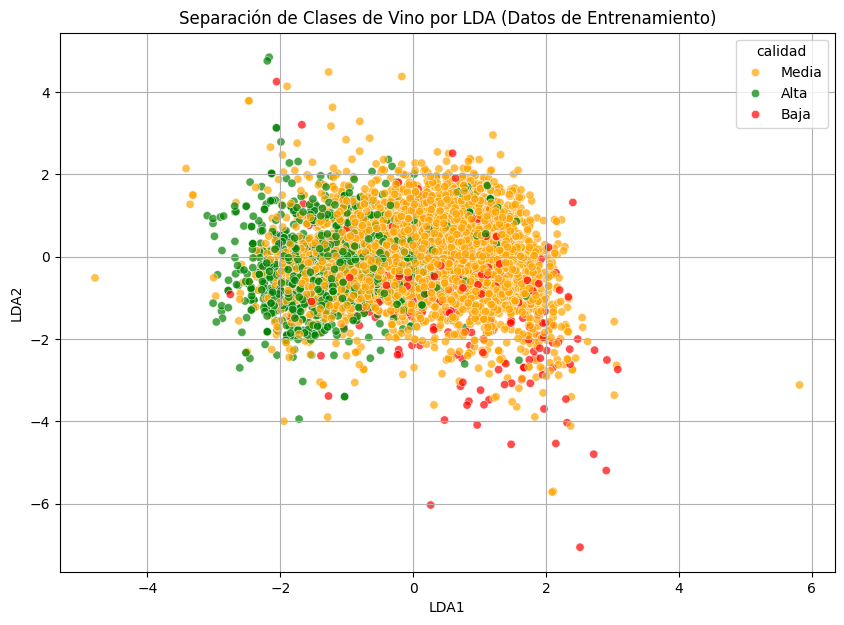

In [ ]:
# 2 componentes LDA a transformar
x_train_lda = lda.transform(x_train_scaled)

# Creamos un DataFrame para graficar con facilidad
df_lda = pd.DataFrame(x_train_lda, columns=['LDA1', 'LDA2'])
df_lda['calidad'] = y_train.values

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_lda,
    x='LDA1',
    y='LDA2',
    hue='calidad',
    palette={'Baja': 'red', 'Media': 'orange', 'Alta': 'green'},
    alpha=0.7
)
plt.title('Separación de Clases de Vino por LDA (Datos de Entrenamiento)')
plt.grid(True)
plt.show()

In [ ]:
# visualizaciones complementarias
df_plot_train =pd.DataFrame(x_train_scaled, columns= x.columns)

In [ ]:
df_plot_train['calidad'] = y_train.values

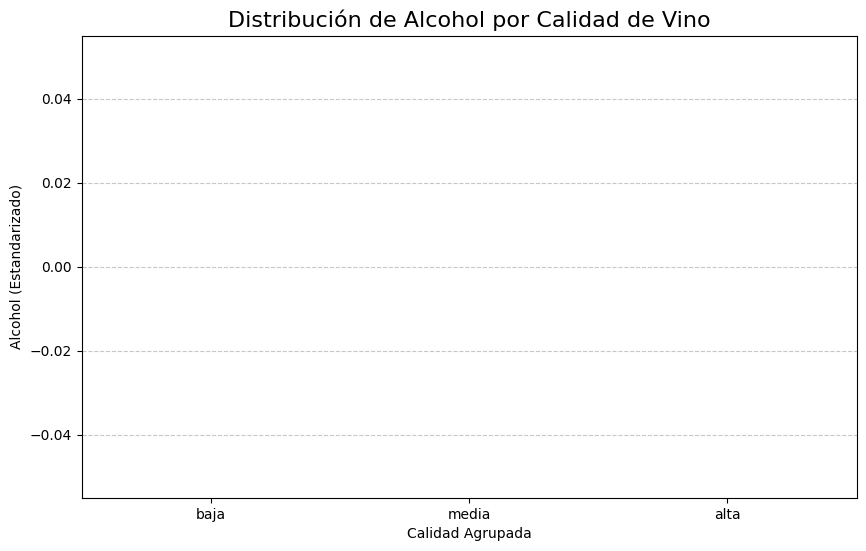

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Gráfico de Violín para 'alcohol' ---
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_plot_train,
    x='calidad',        # Eje X: Nuestras 3 clases
    y='alcohol',        # Eje Y: La feature que queremos comparar
    order=['baja', 'media', 'alta'] # Ordenamos las clases
)
plt.title('Distribución de Alcohol por Calidad de Vino', fontsize=16)
plt.xlabel('Calidad Agrupada')
plt.ylabel('Alcohol (Estandarizado)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

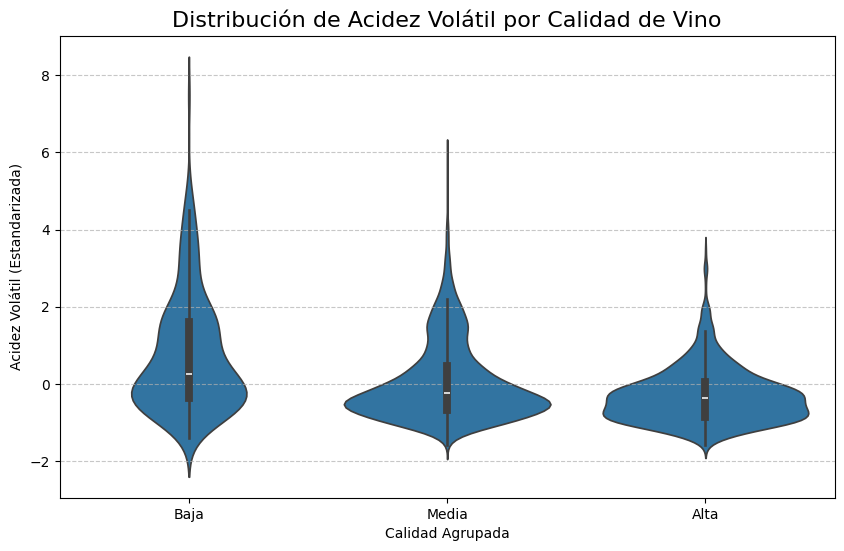

In [ ]:
# --- Gráfico de Violín para 'volatile acidity' ---
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_plot_train,
    x='calidad',
    y='volatile acidity',
    order=['Baja', 'Media', 'Alta']
)
plt.title('Distribución de Acidez Volátil por Calidad de Vino', fontsize=16)
plt.xlabel('Calidad Agrupada')
plt.ylabel('Acidez Volátil (Estandarizada)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

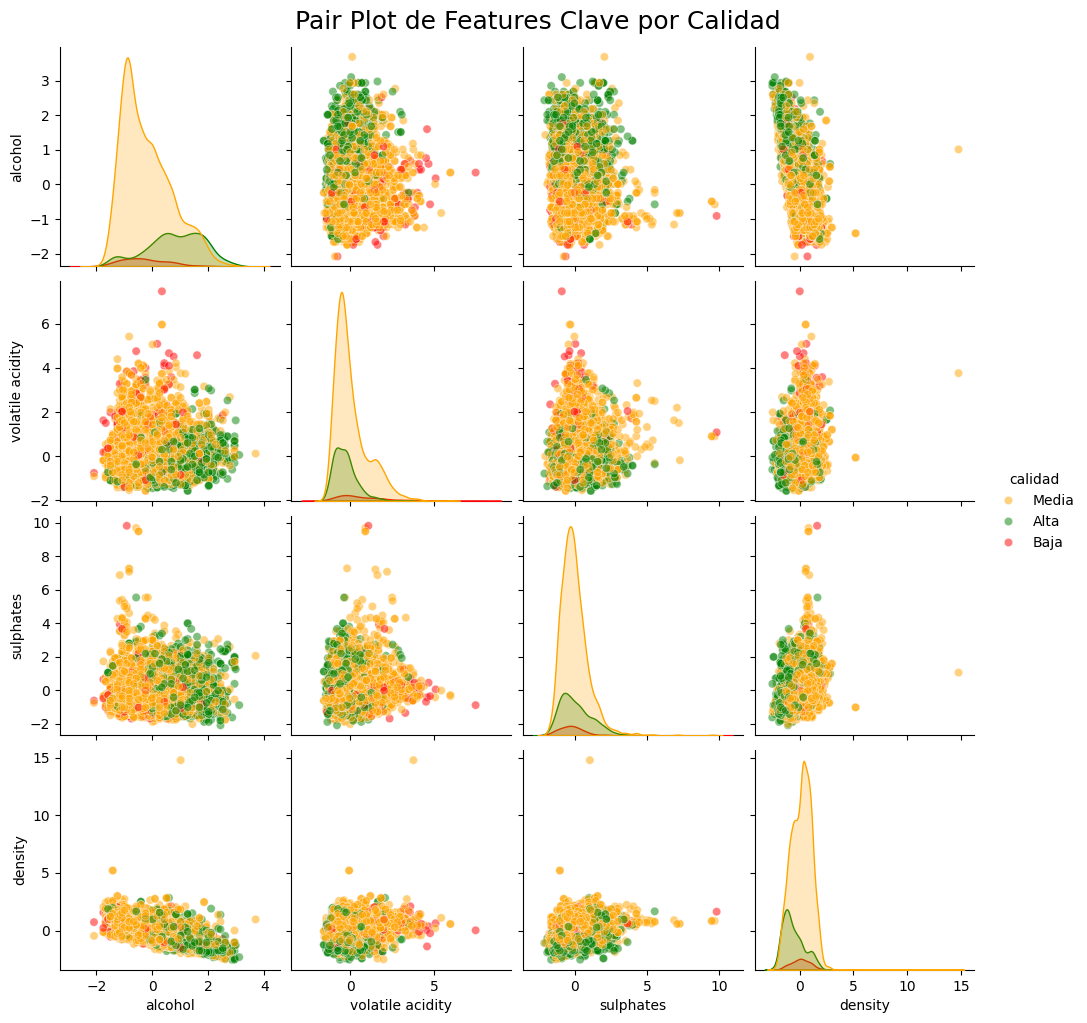

In [ ]:
# Seleccionamos un subconjunto de features clave para el pair plot
features_clave = ['alcohol', 'volatile acidity', 'sulphates', 'density', 'calidad']

# 'hue' colorea los puntos según nuestra clase 'calidad'
sns.pairplot(
    df_plot_train[features_clave],
    hue='calidad',
    palette={'Baja': 'red', 'Media': 'orange', 'Alta': 'green'},
    plot_kws={'alpha': 0.5} # Añadimos transparencia
)
plt.suptitle('Pair Plot de Features Clave por Calidad', y=1.02, fontsize=18)
plt.show()

In [ ]:
# creacion de heatmap

df_corr = df_plot_train.copy()

# Mapeamos 'calidad' a números para incluirla en la correlación
mapa_calidad = {'baja': 0, 'media': 1, 'alta': 2}
df_corr['calidad_num'] = df_corr['calidad'].map(mapa_calidad)

# Calculamr matriz de correlación
corr_matrix = df_corr.drop('calidad', axis=1).corr()

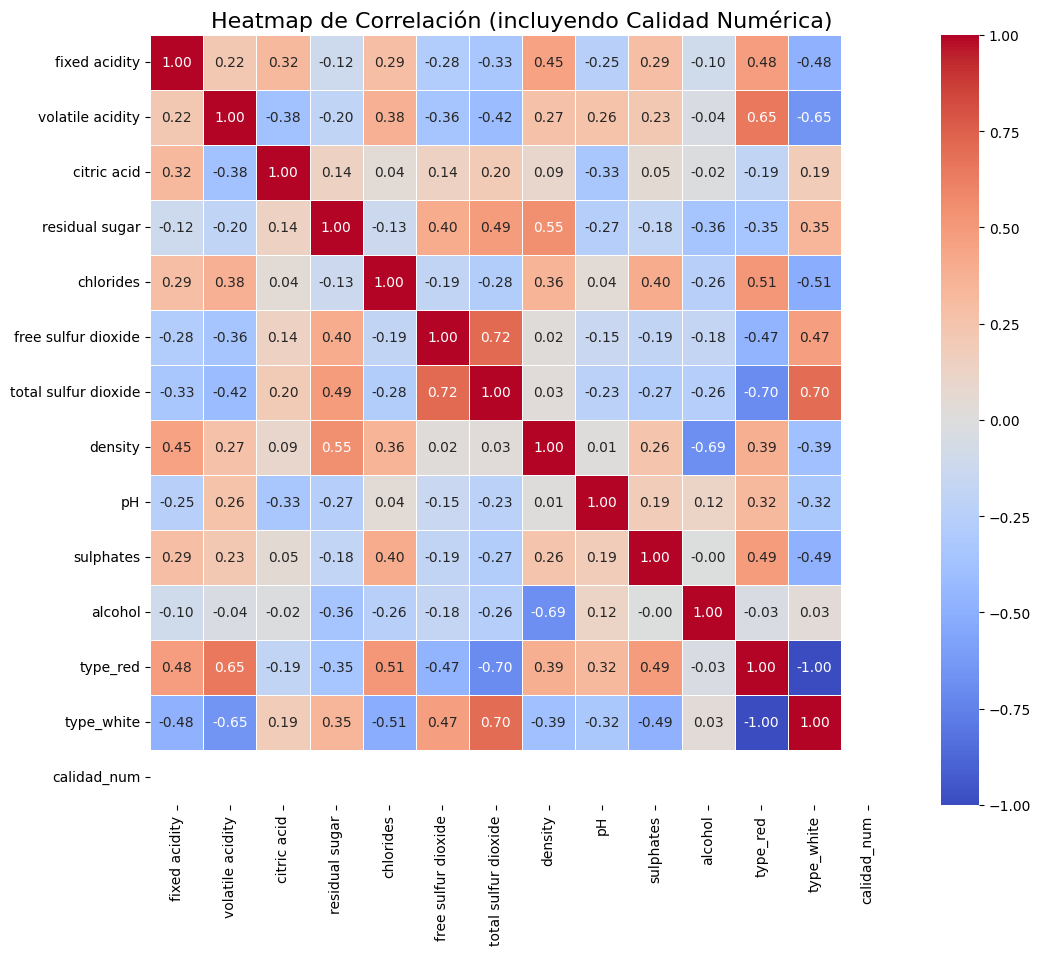

In [ ]:
# Graficamos el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Heatmap de Correlación (incluyendo Calidad Numérica)', fontsize=16)
plt.show()